<a href="https://colab.research.google.com/github/hasibzunair/neuralwhat/blob/master/colabs/stain_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install staintools

    100% |████████████████████████████████| 1.9MB 14.1MB/s 
  Running setup.py bdist_wheel for staintools ... - \ done
  Stored in directory: /root/.cache/pip/wheels/03/44/0c/aadfe7dfaa9083b211f490e671bbf9a26e6e9ce21ef21fc21f
  Running setup.py bdist_wheel for spams ... - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/76/a6/a8/5959872693a82d5497a91aee3665bb1676cee33304d86c1495
Successfully built staintools spams


In [0]:
import numpy as np 
import pandas as pd 
import os
import glob
import cv2
import random
import matplotlib.pyplot as plt
import staintools

np.random.seed(1)

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [6]:
!ls

kaggle.json  sample_data  x_test.npy   x_val.npy   y_train.npy
malaria.zip  vgg_1a.h5	  x_train.npy  y_test.npy  y_val.npy


In [0]:
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d hasibzunair/malaria

User cancelled operation


In [8]:
os.listdir()

['.config',
 'vgg_1a.h5',
 'kaggle.json',
 'y_val.npy',
 'y_test.npy',
 'malaria.zip',
 'y_train.npy',
 'x_train.npy',
 'x_test.npy',
 'x_val.npy',
 'sample_data']

In [0]:
!unzip 'malaria.zip'

Archive:  malaria.zip
  inflating: y_test.npy              
  inflating: x_test.npy              
  inflating: y_train.npy             
  inflating: y_val.npy               
  inflating: x_train.npy             
  inflating: x_val.npy               


In [0]:
!ls

kaggle.json  sample_data  x_train.npy  y_test.npy   y_val.npy
malaria.zip  x_test.npy   x_val.npy    y_train.npy


In [9]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_train.shape, y_train.shape

((22046, 200, 200, 3), (22046, 2))

In [10]:
x_val = np.load("x_val.npy")
y_val = np.load("y_val.npy")
x_val.shape, y_val.shape

((2756, 200, 200, 3), (2756, 2))

In [11]:
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")
x_test.shape, y_test.shape

((2756, 200, 200, 3), (2756, 2))

6432
[0. 1.]


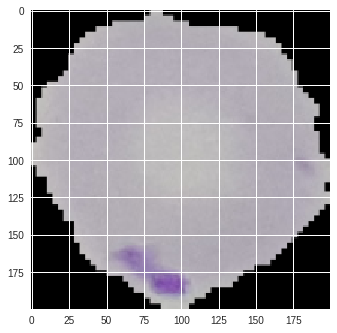

In [19]:
idx = random.randint(0, len(x_train))

plt.imshow(x_train[idx])
print(idx)
print(y_train[idx])

In [13]:
print(x_train.shape, y_train.shape)
print(x_val.shape, x_test.shape, y_val.shape, y_test.shape)

(22046, 200, 200, 3) (22046, 2)
(2756, 200, 200, 3) (2756, 200, 200, 3) (2756, 2) (2756, 2)


In [20]:
idx = random.randint(0, len(x_train))

# random image from training set
x = 6432
img = x_train[x]
img_transform = x_train[x]

idx, y_train[idx], img.shape, img_transform.shape

(17659, array([1., 0.], dtype=float32), (200, 200, 3), (200, 200, 3))

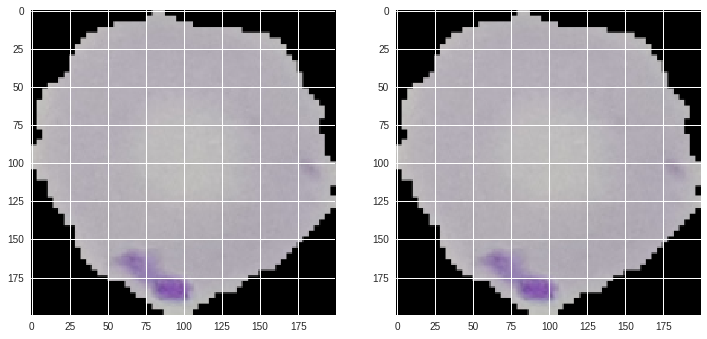

In [21]:
# plot it
fig=plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)

ax1.imshow(np.squeeze(img))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.squeeze(img_transform))

In [22]:
# Read data
#target = staintools.read_image("./data/my_target_image.png")
#to_transform = staintools.read_image("./data/my_image_to_transform.png")


# here, both are same image
target = img
to_transform = img_transform

# Standardize brightness (This step is optional but can improve the tissue mask calculation)
target = staintools.LuminosityStandardizer.standardize(target)
to_transform = staintools.LuminosityStandardizer.standardize(to_transform)

# Stain normalize
normalizer = staintools.StainNormalizer(method='vahadane')
normalizer.fit(target)
transformed = normalizer.transform(to_transform)
transformed.shape

(200, 200, 3)

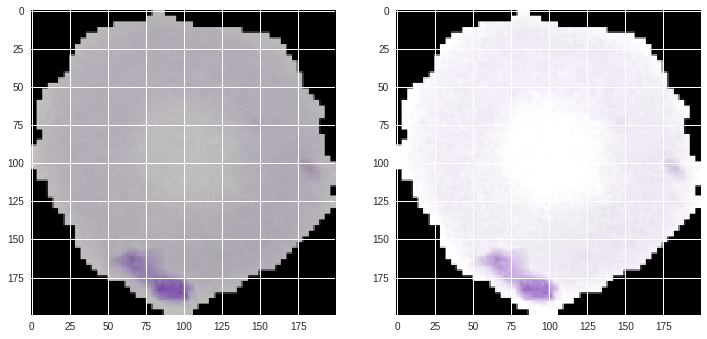

In [23]:
fig=plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2,1)

ax1.imshow(np.squeeze(img))
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(np.squeeze(transformed))